## Task 3: Correlation Analysis

In [1]:
# Ensure src/ is importable
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

%load_ext autoreload
%autoreload 2

# Import the analysis classes  
from src.stock_loader import StockDataset
from IPython.display import Image, display

Stock loader look for data in: D:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_1\KAIM_Week1\data\yfinance_data


In [2]:
# Imports
from src.fa.correlation_analyzer import CorrelationAnalyzer


In [3]:
# --- CHOOSE YOUR STOCK & LOAD DATA (Re-run from Task 1 & 2) ---
TICKER = 'MSFT' 

# News Data (from Task 1)
from src.data_loader import DataLoader
data_loader = DataLoader("../data/newsData/raw_analyst_ratings.csv")
news_df = data_loader.load_news_data() 

# Load Stock Data (from Task 2)
stock_loader = StockDataset(ticker=TICKER)
stock_df = stock_loader.load()

✅ Loaded MSFT: 3774 rows, 2009-01-02 → 2023-12-29


In [4]:
stock_df.columns = stock_df.columns.str.strip().str.title()

In [5]:
# 2. Initialize and Run Correlation Analysis
print("\n--- 2. Correlation Analysis Setup ---")
# Initialize the analyzer with both dataframes
analyzer = CorrelationAnalyzer(news_df=news_df, stock_df=stock_df, headline_col='headline')


--- 2. Correlation Analysis Setup ---
✅ Correlation Analyzer initialized.


In [6]:
# 3. Perform Sentiment Analysis
analyzer.perform_sentiment_analysis()

✅ Sentiment analysis complete.


,Unnamed: 0,headline,url,publisher,date,stock,headline_len,date_only,hour_utc,hour_est,day_of_week,sentiment_score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,14,10,Friday,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,14,10,Wednesday,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,8,4,Tuesday,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,16,12,Friday,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,15,11,Friday,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,38,2011-08-29,0,20,Monday,0.15
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,52,2011-06-22,0,20,Wednesday,0.15
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,56,2011-06-21,0,20,Tuesday,0.00
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,54,2011-06-21,0,20,Tuesday,0.00


In [7]:
# 4. Align, Aggregate, and Compute Returns
merged_correlation_df = analyzer.align_and_aggregate_data()

print("\nLast 5 merged days (Sentiment vs. Lagged Return):")
print(merged_correlation_df[['avg_daily_sentiment', 'daily_news_volume', 'Close', 'lagged_return']].tail().to_markdown(numalign="left", stralign="left"))

 Daily sentiment aggregated over 3955 days.
✅ Data alignment and aggregation complete. Merged DF size: 2757

Last 5 merged days (Sentiment vs. Lagged Return):
|            | avg_daily_sentiment   | daily_news_volume   | Close   | lagged_return   |
|:-----------|:----------------------|:--------------------|:--------|:----------------|
| 2020-06-05 | 0.110735              | 932                 | 179.059 | 0.0061966       |
| 2020-06-08 | 0.0599708             | 765                 | 180.169 | 0.00764503      |
| 2020-06-09 | 0.0183603             | 803                 | 181.546 | 0.0370915       |
| 2020-06-10 | -0.00916526           | 807                 | 188.28  | -0.0536982      |
| 2020-06-11 | 0.00716171            | 544                 | 178.17  | 0.00789173      |


In [8]:
# 5. Calculate Correlation
print("\n--- 5. Final Correlation Calculation ---")
correlation_coefficient = analyzer.calculate_correlation()


--- 5. Final Correlation Calculation ---
--------------------------------------------------
Correlation between TODAY's Avg Sentiment and TOMORROW's Return: -0.0024
Correlation between TODAY's Avg Sentiment and TODAY's Return: 0.0329
--------------------------------------------------
✅ Correlation scatter plot saved: reports/figures/sentiment_correlation.png



--- Visualization: Sentiment vs. Lagged Return ---


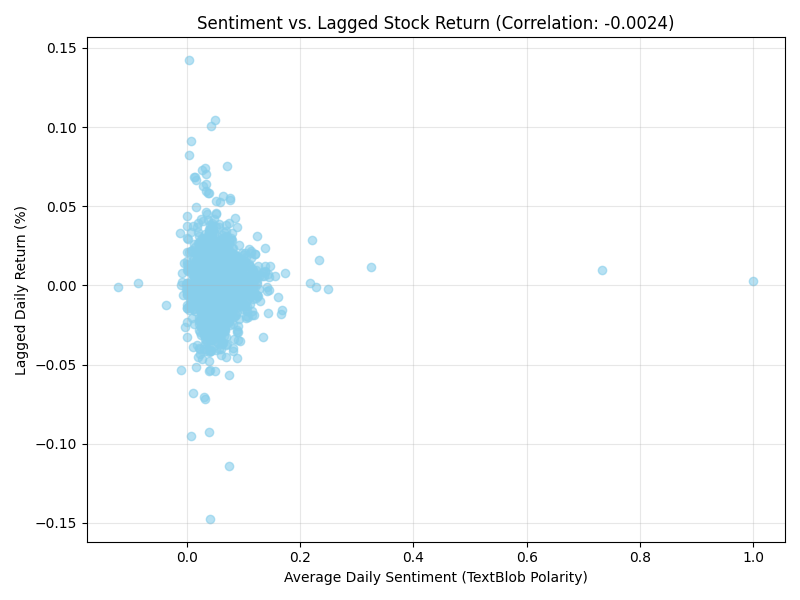

In [9]:
# 6. Display the Plot
print("\n--- Visualization: Sentiment vs. Lagged Return ---")
display(Image(filename=f"reports/figures/sentiment_correlation.png"))

Key Finding & Interpretation